## dados geográficos
---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

para processar mapas e dados geográficos, deve-sefrom mpl_toolkits.basemap import Basemap

In [2]:
from mpl_toolkits.basemap import Basemap

daí, pode-se fazer gráficos como

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


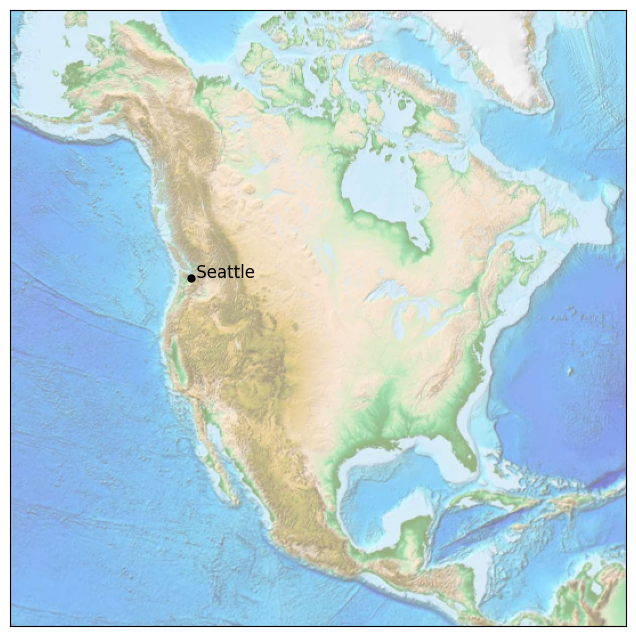

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# mapeando (longitude, latitude) para (x, y) para o gráfic
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

#### tipos de projeções
---

como já é sabido, não possível passar para o mapa as dimensões da terra de forma perfeita. Por isso, quando for criar mapas, deve-se escolher qual projeção usar. As mais famosas são a *projeção cilíndrica equidistante*, o *mercator* e a *área cilíndrica igual*.

antes de mais nada, vamos criar uma função que altomaticamente faz o mapa:

In [16]:
from itertools import chain

def FazMapa(m, escala=0.2):
    #faz o relevo sombreado
    m.shadedrelief(scale=escala)

    #todo o resto é referente às linhas de latitude e longitude
    #latitudes e longitudes são retornadas como dicionários
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    #chaves contendo as instâncias plt.Lines2d
    lat_linhas = chain(*(tup[1][0] for tup in lats.items()))
    lon_linhas = chain(*(tup[1][0] for tup in lons.items()))
    all_linhas = chain(lat_linhas, lon_linhas)

    #percorre as linhas e define o estilo desejado
    for linha in all_linhas:
        linha.set(linestyle='-', alpha=0.3, color='w')

para a imagem do mapa, é necessário passar para o objeto `Basemap()` os parâmetro `projection=`, que é referente à projeção que será usada, os valores dos *Lower Left Hand Corner*, abreviado para *llcrnr*, e *Upper Right Hand Corner*, ou *urcrnr*, que devem ser passados tanto para latitude quanto para longitude pelos parâmetro `llcrnrlat=`, `urcrnrlat=`, `llcrnrlon=` e `urcrnrlon=`, respectivamente, que recebem valores em graus.

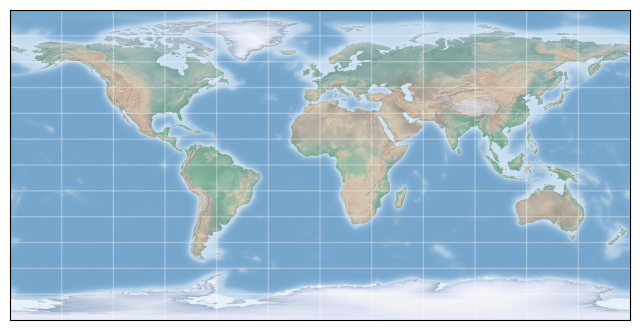

In [17]:
fig = plt.figure(figsize=(8, 6))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
FazMapa(m)

observe que foi passado a projeção padrão `cyl`, para ver todas as possibilidade, no ipython, escreva `Basemap?`.

Pode-se usar, também, os parâmetros `lon_0=` e `lat_0=` para mudar o centro do mapa.

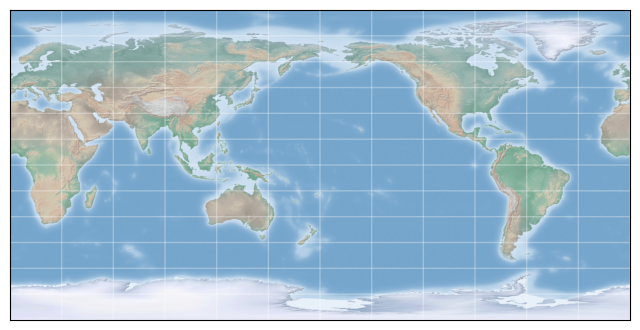

In [18]:
fig = plt.figure(figsize=(8, 6))
m = Basemap(projection='cyl', lon_0=180, lat_0=-90)
FazMapa(m)

para desenhos, o parâmetro `resolution=` serve para equilibrar o desenho das linhas.

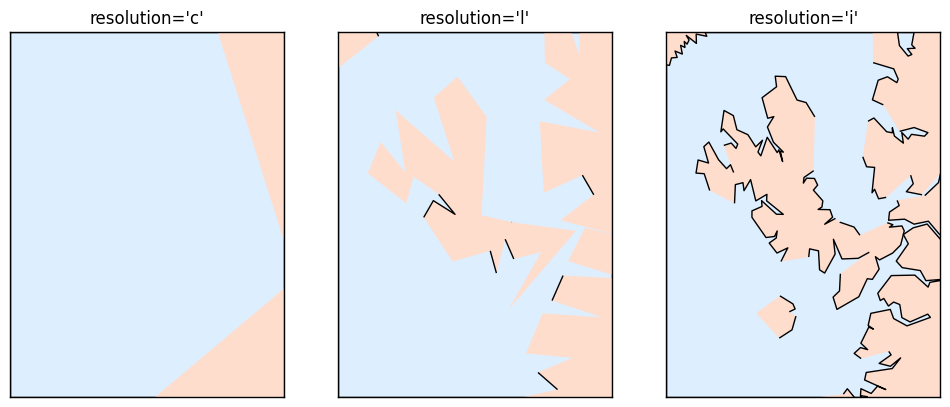

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

for i, res in enumerate(['c', 'l', 'i']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2, width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title(f"resolution='{res}'");

além dessas três opções, há, ainda, a alta resolução `h`, e a resolução cheia `f`, mas para usá-las é necessário baixá-las a parte.

Neste mapa, foi, ainda, usado os parâmetros `width=` e `height=`, que mostram a equivalência em kilômetros no mundo real. A função `.fillcontinent()` serve para colorir as massas de terra; `.drawmapboundary()` serve para desenhar os limites do mapa; `.drawcostline()` serve para desenhar a costa. Há, ainda, diversas outras funções para desenhar mapas
m.função()|descrição
---|---
drawrivers|colore rios
drawcountries|desenha as divisas entre os países
drawgreatcircle|desenha um círculo entre dois pontos
drawparallels|desenha as linhas de latitude, recebe valores de -90° a 90°
drawmeridians|desenha as linhas de longitude, recebe valores de -180 a 180
drawmapscale|desenha uma escala linear no mapa
bluemarble|desenha a versão da NASA do mapa mundi
shadedrelief|projeta um relevo sombreado no mapa
etopo|projeta um relevo etopo no mapa
warimage|projeta uma imagem passada pelo usuário no mapa

há, também, as projeções de perspectiva, de cone, etc. todas podem ser vista indo até o ipython e digitando `Basemap?`

para plotar informações no mapa, pode-se, normalmente, usar as funções e métodos do próprio matplotlib, por exemplo, 

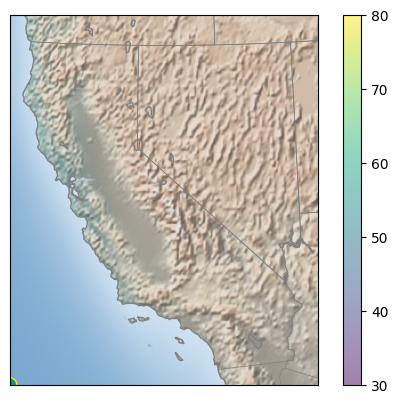

In [54]:
from random import randint

fig = plt.figure()
m = Basemap(projection='lcc', resolution='i', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

x = [np.linspace(35, 35, 50)]
y = [np.linspace(90, 0, 50)]

m.scatter(x, y, s=x, c=x , cmap='viridis', alpha=0.5)
plt.colorbar()
plt.clim(30, 80)